# 프로젝트: Finance Time Series 데이터 활용하기

## Package Import

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인
print(os.listdir('./'))  # 현재 디렉토리의 파일 목록 확인


/home/estherj/aiffel/7. 시계열
['Daily_Demand_Forecasting_Orders.csv', 'AirPassengers.csv', 'fnguide', 'N10.Finance Time Series_JEH_lecture.ipynb', 'airline-passengers.csv', 'N5. 미니프로젝트_시계열분류_JEH.ipynb', 'N10.Finance Time Series_JEH.ipynb', '.ipynb_checkpoints', 'N8. 미니프로젝트_ARIMA, ARCH_JEH.ipynb', '005930.KS.csv', 'EuStockMarkets.csv', 'sub_upbit_eth_min_tick.csv', 'daily-min-temperatures.csv']


,open,high,low,close,volume
time,,,,,
2017-09-25 03:00:00,324500,325500,322000,324000,52.477251
2017-09-25 03:01:00,324000,324000,322500,324000,39.061889
2017-09-25 03:02:00,322500,324500,322500,324500,12.794000
2017-09-25 03:05:00,324000,324000,323000,324000,33.365246
2017-09-25 03:06:00,324000,325000,322500,324000,46.224544


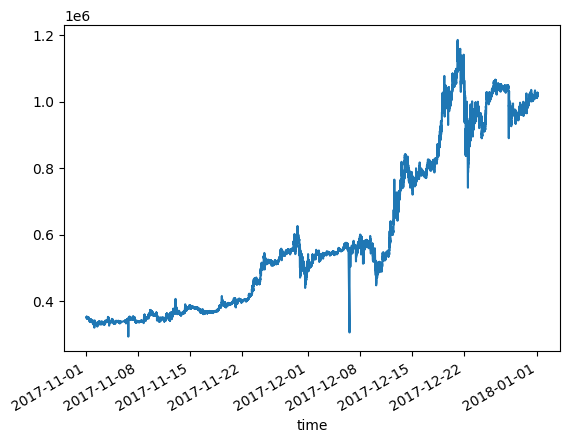

In [4]:
DATA_PATH = '/home/estherj/aiffel/7. 시계열'
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()
modify_data.head()

# 1.Data Labeling

## 1) Price Change Direction 적용하기

In [5]:
# Q. 코드를 작성해주세요

# window 지정 - 조금 더 단기 추세 분석하고자 
window = 5 # 앞서 사용한 window의 값은 10입니다.

# momentum_signal 만들기
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1) # modify_data['close'].shift(window)활용

# s_momentum_signal 만들기
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index) # 데이터 활용을 위해 pd.Series를 사용합니다.

In [6]:
modify_data

,open,high,low,close,volume
time,,,,,
2017-09-25 03:00:00,324500,325500,322000,324000,52.477251
2017-09-25 03:01:00,324000,324000,322500,324000,39.061889
2017-09-25 03:02:00,322500,324500,322500,324500,12.794000
2017-09-25 03:05:00,324000,324000,323000,324000,33.365246
2017-09-25 03:06:00,324000,325000,322500,324000,46.224544
...,...,...,...,...,...
2019-11-03 10:29:00,212650,212800,212600,212800,30.996276
2019-11-03 10:30:00,212800,212800,212600,212600,3.224132
2019-11-03 10:31:00,212600,212600,212400,212400,135.351681


In [7]:
momentum_signal #모멘텀(추세 신호)를 계산, 차이 값의 부호를 계산 1, -1

time
2017-09-25 03:00:00    NaN
2017-09-25 03:01:00    NaN
2017-09-25 03:02:00    NaN
2017-09-25 03:05:00    NaN
2017-09-25 03:06:00    NaN
                      ... 
2019-11-03 10:29:00    1.0
2019-11-03 10:30:00    0.0
2019-11-03 10:31:00    0.0
2019-11-03 10:32:00    0.0
2019-11-03 10:33:00    0.0
Name: close, Length: 1000000, dtype: float64

In [8]:
s_momentum_signal # momentum_signal은 넘파이 배열, pandas 시계열 데이터로 관리하기 위해 사용

time
2017-09-25 03:00:00    NaN
2017-09-25 03:01:00    NaN
2017-09-25 03:02:00    NaN
2017-09-25 03:05:00    NaN
2017-09-25 03:06:00    NaN
                      ... 
2019-11-03 10:29:00    1.0
2019-11-03 10:30:00    0.0
2019-11-03 10:31:00    0.0
2019-11-03 10:32:00    0.0
2019-11-03 10:33:00    0.0
Name: close, Length: 1000000, dtype: float64

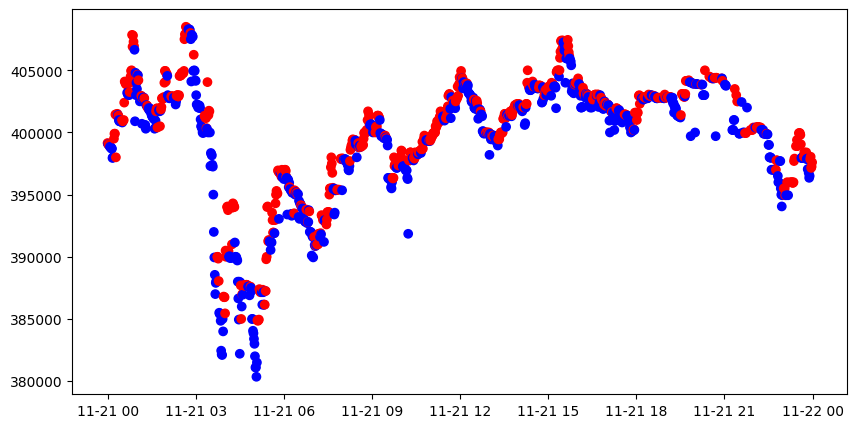

In [9]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
sub_data = modify_data.loc['2017-11-21', 'close'] # loc를 활용하여 2017-11-21부터 close(종가)까지 가져오기

# 수식 적용된 데이터 만들기
c_sig = s_momentum_signal.loc['2017-11-21'] # loc를 활용하여 2017-11-21의 시간대별 값을 가져오기

# 두 데이터의 비교를 위한 색상 바꾸기
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue') # np.where 사용

# 시각화하기
plt.figure(figsize = (10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

In [10]:
sub_data #특정 날짜(2017-11-21)의 종가 데이터, 시각화의 **x축(시간)**과 y축(종가) 값으로 사용
# 시각화에서 sub_data를 사용해 종가를 점으로 표시

time
2017-11-21 00:00:00    399150
2017-11-21 00:01:00    399050
2017-11-21 00:02:00    399050
2017-11-21 00:03:00    399000
2017-11-21 00:04:00    398900
                        ...  
2017-11-21 23:55:00    397850
2017-11-21 23:56:00    398050
2017-11-21 23:57:00    397150
2017-11-21 23:58:00    397250
2017-11-21 23:59:00    397600
Name: close, Length: 1301, dtype: int64

In [11]:
c_sig # 특정 날짜(2017-11-21)의 상승/하락 신호(s_momentum_signal), 각 시간대의 신호(1: 상승, -1: 하락)에 따라 색상

time
2017-11-21 00:00:00                                                  1.0
2017-11-21 00:01:00                                                  0.0
2017-11-21 00:02:00                                                  1.0
2017-11-21 00:03:00                                                  1.0
2017-11-21 00:04:00                                                  1.0
                                             ...                        
2017-11-21 23:56:00                                                  1.0
2017-11-21 23:57:00                                                  1.0
2017-11-21 23:58:00                                                  1.0
2017-11-21 23:59:00                                                  1.0
color                  [red, blue, red, red, red, blue, blue, blue, b...
Name: close, Length: 1302, dtype: object

## 2) Using Moving Average 적용하기

In [12]:
# Q. 코드를 작성해주세요

# momentum_signal 
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1) # modify_data['close'].rolling(window).mean() 활용

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index) # pd.Series로 변환

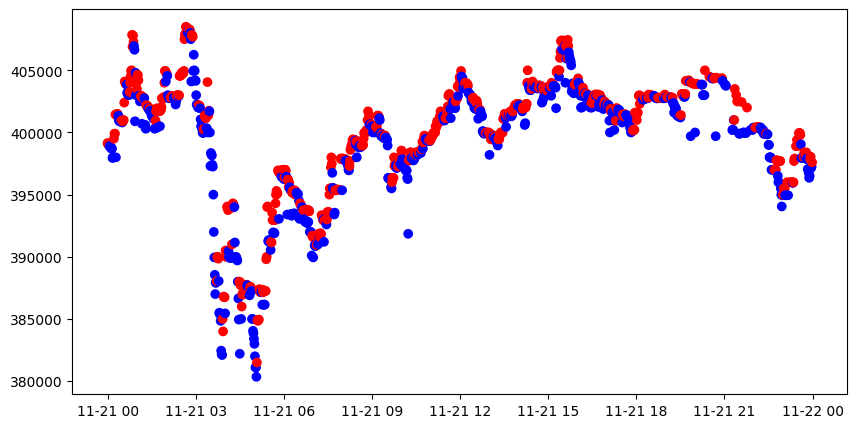

In [13]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
sub_data = modify_data.loc['2017-11-21', 'close']

# 수식 적용된 데이터 만들기
c_sig = s_momentum_signal.loc['2017-11-21']

# 두 데이터의 비교를 위한 색상 바꾸기
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# 시각화하기
plt.figure(figsize = (10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

## 3)  Local Min-Max 적용하기

In [14]:
# Q. 코드를 작성해주세요

# Local min / max 를 추출하기 위한 함수
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0] # ①
    n_cnt_min, n_cnt_max = 0, 0
    
    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False
    
    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val # ②
            maxes.append(max_value) # ③
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True # ④
        
        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0
    
        if not b_min_update:
            b_max_update = False # ⑤
            n_cnt_max += 1 # ⑥
            if n_cnt_max >= wait:
                min_value = max_value # ⑦
                n_cnt_max = 0
               
    return  pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

In [15]:
# Local mins, maxes를 확인
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes 확인 
print(mins)
print('--'*20)
print(maxes)

               min_time  local_min
0   2017-11-21 00:01:00     399050
1   2017-11-21 00:03:00     399000
2   2017-11-21 00:04:00     398900
3   2017-11-21 00:05:00     398850
4   2017-11-21 00:06:00     398800
..                  ...        ...
472 2017-11-21 23:48:00     397850
473 2017-11-21 23:50:00     397050
474 2017-11-21 23:52:00     396750
475 2017-11-21 23:53:00     396350
476 2017-11-21 23:59:00     397600

[477 rows x 2 columns]
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3   2017-11-21 00:19:00     401350
4   2017-11-21 00:20:00     401500
..                  ...        ...
268 2017-11-21 23:41:00     398050
269 2017-11-21 23:43:00     398400
270 2017-11-21 23:46:00     398200
271 2017-11-21 23:47:00     398400
272 2017-11-21 23:56:00     398050

[273 rows x 2 columns]


(376546.5, 412585.0)

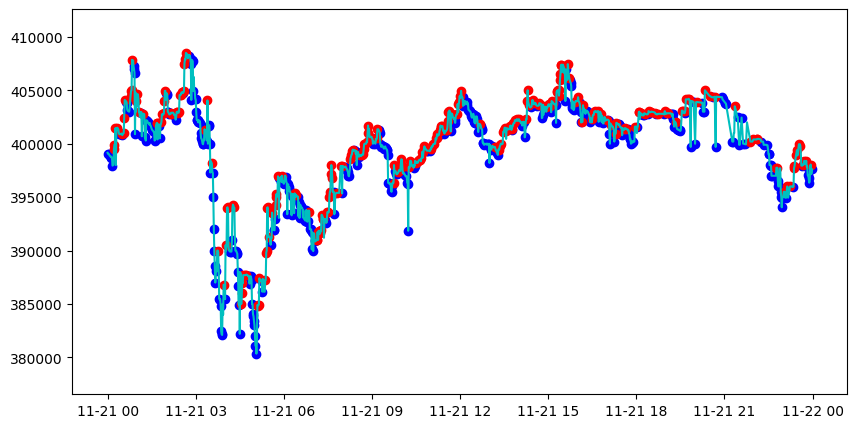

In [16]:
# Q. 코드를 작성해주세요

# subplots 및 plot 생성
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')

# min_time, local_min을 활용한 scatter plot 생성
ax.scatter(mins.min_time, mins.local_min, c='blue')

# maxes_time, local_max를 활용한 scatter plot 생성
ax.scatter(maxes.max_time, maxes.local_max, c='red')

# y축 설정
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

## 4) Trend Scanning 적용하기

In [17]:
def t_val_lin_r(close):
    import statsmodels.api as sml
    
    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit() 
    return ols.tvalues[1]

In [18]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [19]:
# Q. 코드를 작성해주세요

# 이 코드 블럭은 실행에 20-30분정도가 소요될 수 있습니다.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # 전방 탐색을 위한 샘플 추출
    if look_forward_window > subset.shape[0]:
        continue
    
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 t 통계량값을 이용하여 추세 추정
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))  # t-value 사용
    
    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|████████████████████████████████████████████████████████████████████████████| 33384/33384 [04:31<00:00, 122.91it/s]


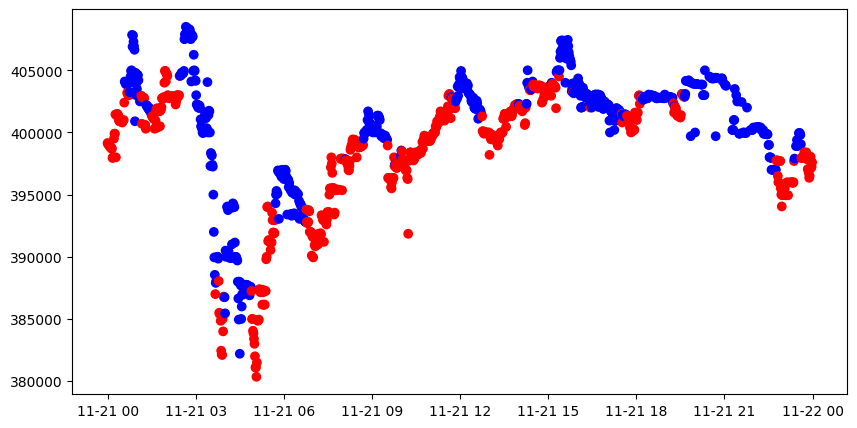

In [20]:
# 시각화
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

# 2. Feature Engineering

## ① 환경구성 및 데이터 불러오기

In [21]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/home/estherj/aiffel/7. 시계열/fnguide/data/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
# 데이터 경로 설정
DATA_PATH = '/home/estherj/aiffel/7. 시계열/fnguide/data/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# 데이터 불러오기
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]


## ② Technical Index 적용하기

In [23]:
# 기술적 지표를 적용합니다.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [24]:
# 수익률 / 변동성 지표를 적용합니다.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [25]:
# Q. 코드를 작성해주세요

df_tmp_data = df_.join(df_label_data).dropna()

# X, y 데이터셋 만들기
X = df_tmp_data.iloc[:, 5:-1] 
y = df_tmp_data.iloc[:, -1] # iloc[:, -1] 사용

# StandardScaler 적용
sc = StandardScaler()

# fit_transform 사용
X_sc = sc.fit_transform(X)

# DataFrame 변환
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [26]:
# Q. 코드를 작성해주세요

# RandomForest 모델 적용
rfc = RandomForestClassifier(class_weight='balanced')

# RandomForest fit 하기
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

## ③ Feature Selection methods 적용하기

In [27]:
# MDI, Mean Decrease Impurity 
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

,mean,std
volume_cmf,0.048883,0.002169
volume_fi,0.045925,0.002173
volume_mfi,0.045480,0.001993
volume_sma_em,0.034445,0.001720
volume_vpt,0.024704,0.001404
volatility_atr,0.077000,0.003283
volatility_ui,0.051595,0.002510
trend_macd_diff,0.070042,0.003784
trend_adx,0.056508,0.002516
trend_trix,0.064264,0.003023


In [28]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree 및 Support Vector Machine 외에 다른 분류기(classifier)를 사용해봅시다.
cv = KFold(n_splits=5) # n_splits을 변경해봅시다.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [29]:
# plot_feature_importance 함수 만들기
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path) 
    else:
        plt.show()

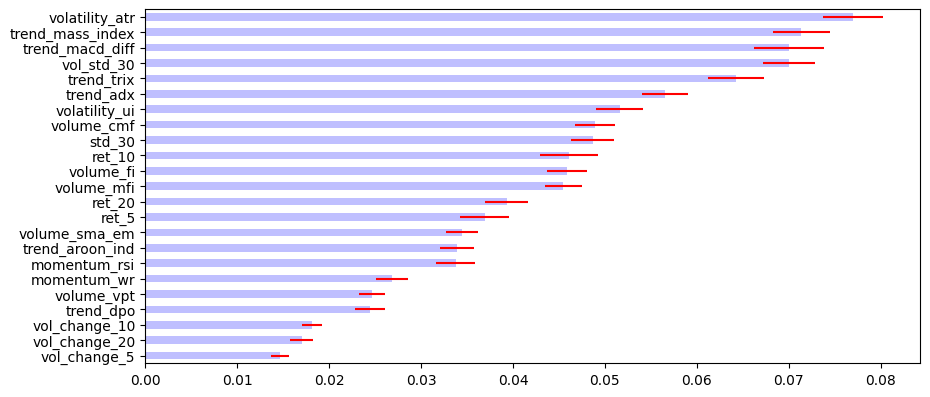

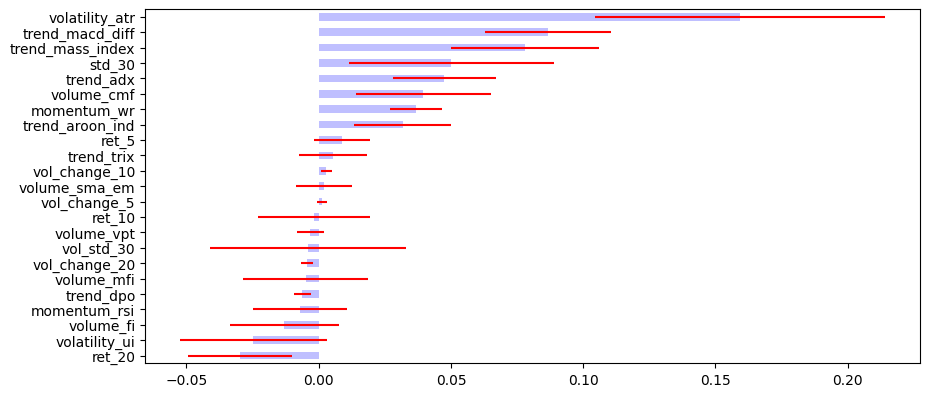

In [30]:
# Q. 코드를 작성해주세요

# feat_imp 확인
plot_feature_importance(feat_imp)

# feat_imp_mda 확인
plot_feature_importance(feat_imp_mda)

In [31]:
# Q. 코드를 작성해주세요

# RFE CV, Recursive Feature Elimination
svc_rbf = SVC(kernel='linear', probability=True) 
rfe_cv = RFECV(svc_rbf, cv=cv) # RFECV
rfe_fitted =  rfe_cv.fit(X_sc, y) # fit

In [32]:
# 선택된 피쳐 확인하기

rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df
rfe_df[rfe_df["Optimal_Features"]==True]

,Optimal_Features,Ranking
volatility_atr,True,1
trend_macd_diff,True,1
std_30,True,1


In [33]:
# SFS, Sequential Feature Selection

n = 5
sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [34]:
# 선택된 피쳐 확인하기

sfs_rank = sfs_fitted.get_support()
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns=["Optimal_Features"])
selected_features = sfs_df[sfs_df["Optimal_Features"] == True].index
print(selected_features)

Index(['volume_mfi', 'trend_macd_diff', 'trend_adx', 'trend_dpo',
       'vol_change_20'],
      dtype='object')


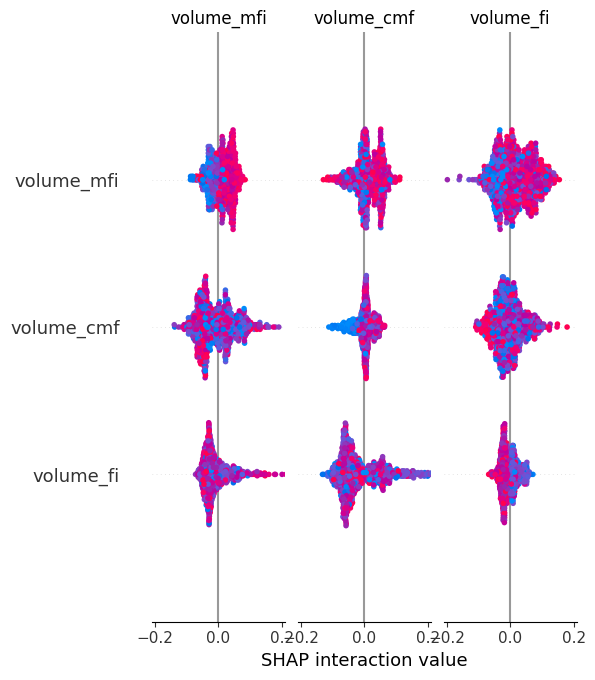

In [35]:
# Q. 코드를 작성해주세요

# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc 사용 shap.summary_plot 그리기
shap.summary_plot(shap_value, X_sc)

# 3. Model Traning

## ① 환경구성 및 데이터 불러오기

In [36]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/home/estherj/aiffel/7. 시계열/fnguide/data/')
from libs.mlutil.pkfold import PKFold

In [39]:
# 데이터 경로 설정 및 pickle 파일 불러오기
DATA_PATH = '/home/estherj/aiffel/7. 시계열/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:1000]

## ② Purged K-fold for Cross-Validation적용하기

In [40]:
# Q. 코드를 작성해주세요
# 4보다 조금 더 학습데이터양을 늘려 추세를 잘 학습하도록 하고 학습 시간은 너무 많이 소요(10인경우보다) 되지 않게 5 선
n_cv = 5 # 앞에서 지정한 값은 4입니다. 얼마를 넣을지 생각해보고 왜 이 값을 넣었는지에 대해서 설명해봅시다.
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0)

- n=4에서 모델의 재현율은 높지만 정밀도가 낮아 False Positive를 줄이는 것이 필요했음
- 조금 더 학습데이터양을 늘려 추세를 잘 학습하도록 하고 학습 시간은 너무 많이 소요(10인경우보다) 되지 않게 선택

## ③ Model 적용하기

In [41]:
# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'estimator__max_depth': [3,5,10,20],
             'estimator__max_features': [None, 'auto'],
             'estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

In [42]:
# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

In [43]:
# Q. 코드를 작성해주세요

# Bagging 적용
bag_rfc = BaggingClassifier(rfc)

In [44]:
# Q. 코드를 작성해주세요

# GridSearchCV 적용
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

In [45]:
# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


BaggingClassifier(bootstrap_features=True,
                  estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=3,
                                                   max_features=None,
                                                   min_samples_leaf=10),
                  max_features=0.7, n_estimators=5)

In [46]:
# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [47]:
# Q. 코드를 작성해주세요

# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[80 56]
 [14 41]]
정확도:0.6335078534031413, 정밀도:0.422680412371134, 재현율:0.7454545454545455


auc:0.6668449197860963


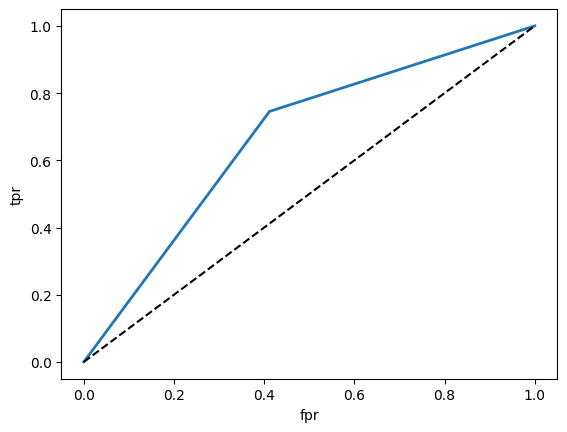

In [48]:
# Q. 코드를 작성해주세요

# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

#### n=4로 유지하면서 parameter 다른걸로 변경해보기

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
================= confusion matrix ====================
[[86 50]
 [10 45]]
정확도:0.6858638743455497, 정밀도:0.47368421052631576, 재현율:0.8181818181818182
auc:0.7252673796791445


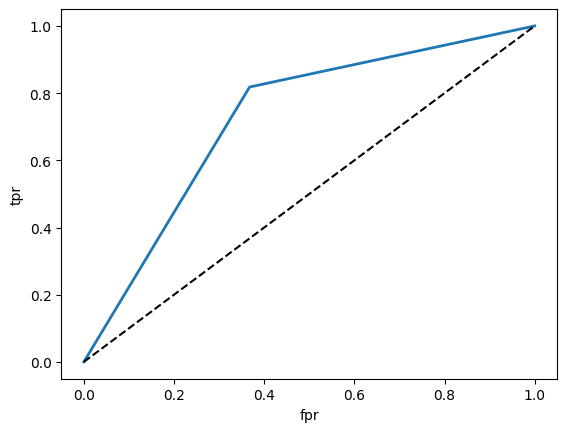

In [49]:
# 데이터 경로 설정 및 pickle 파일 불러오기
DATA_PATH = '/home/estherj/aiffel/7. 시계열/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:1000]

# 4가 더 좋았으므로 이걸로 일단 재진행
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0)

# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'estimator__max_depth': [3,5,10,20],
             'estimator__max_features': [None, 'auto'],
             'estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

# Bagging 적용
bag_rfc = BaggingClassifier(rfc)

# GridSearchCV 적용
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')


In [51]:
print(gs_rfc_best)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=20,
                                                   max_features=None,
                                                   min_samples_leaf=10),
                  max_features=0.7)


#### 하이퍼파라미터 재조정

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
================= confusion matrix ====================
[[90 46]
 [15 40]]
정확도:0.680628272251309, 정밀도:0.46511627906976744, 재현율:0.7272727272727273
auc:0.6945187165775402


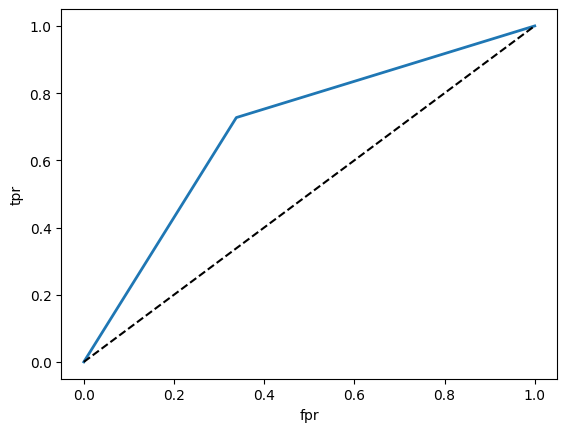

In [52]:
# 데이터 경로 설정 및 pickle 파일 불러오기
DATA_PATH = '/home/estherj/aiffel/7. 시계열/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:1000]

# 4가 더 좋았으므로 이걸로 일단 재진행
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0)

# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [10, 20, 50],
             'max_features': [0.5, 0.7, 1.0],
             'estimator__max_depth': [5,10,15,20],
             'estimator__max_features': [None, 'auto', 'sqrt'],
             'estimator__min_samples_leaf': [5, 10, 20],
             'bootstrap_features': [False, True]
            }

# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

# Bagging 적용
bag_rfc = BaggingClassifier(rfc)

# GridSearchCV 적용
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')


In [53]:
print(gs_rfc_best)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=20,
                                                   max_features=None,
                                                   min_samples_leaf=20))


#### 다른 모델로 테스트(lgbm)

In [54]:
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# LGBMClassifier를 사용한 Bagging 모델
lgbm = LGBMClassifier(class_weight='balanced')
bag_lgbm = BaggingClassifier(estimator=lgbm)

# GridSearchCV 파라미터 설정
lgbm_params = {
    'n_estimators': [10, 50, 100],  # Bagging의 앙상블 개수
    'max_features': [0.5, 0.7],  # Bagging에서 사용할 최대 특성 비율
    'estimator__learning_rate': [0.01, 0.1, 0.3],  # LGBMClassifier의 파라미터
    'estimator__max_depth': [3, 5, 10],  # LGBMClassifier의 파라미터
    'estimator__subsample': [0.8, 1.0]  # LGBMClassifier의 파라미터
}

# GridSearchCV 적용
gs_lgbm = GridSearchCV(bag_lgbm, lgbm_params, cv=cv, n_jobs=-1, verbose=1)

# 모델 학습
gs_lgbm.fit(train_x, train_y)

# 최적 모델
gs_lgbm_best = gs_lgbm.best_estimator_
print(gs_lgbm_best)


Fitting 4 folds for each of 108 candidates, totalling 432 fits
BaggingClassifier(estimator=LGBMClassifier(class_weight='balanced',
                                           learning_rate=0.01, max_depth=3,
                                           subsample=0.8),
                  max_features=0.7, n_estimators=100)


In [55]:
# 예측값 확인
pred_y = gs_lgbm_best.predict(test_x)
prob_y = gs_lgbm_best.predict_proba(test_x)

In [56]:
# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[84 52]
 [14 41]]
정확도:0.6544502617801047, 정밀도:0.44086021505376344, 재현율:0.7454545454545455


auc:0.6815508021390375


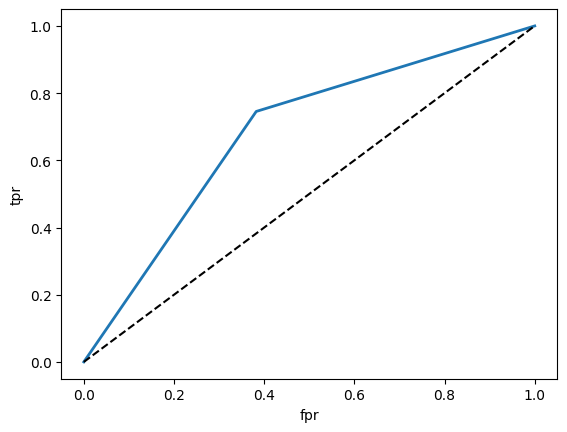

In [57]:
# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

#### 다른 모델로 테스트(xgboost)

In [58]:
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost 모델을 사용하는 Bagging Classifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
bag_xgb = BaggingClassifier(estimator=xgb)

# GridSearchCV 파라미터 설정
xgb_params = {
    'n_estimators': [10, 20, 50],  # BaggingClassifier의 앙상블 크기
    'max_features': [0.5, 0.7, 1.0],  # BaggingClassifier의 max_features
    'estimator__learning_rate': [0.01, 0.1, 0.3],  # XGBClassifier의 learning_rate
    'estimator__max_depth': [3, 5, 10],  # XGBClassifier의 max_depth
    'estimator__subsample': [0.8, 1.0],  # XGBClassifier의 subsample
    'estimator__colsample_bytree': [0.7, 1.0]  # XGBClassifier의 colsample_bytree
}

# GridSearchCV 생성
gs_xgb = GridSearchCV(bag_xgb, xgb_params, cv=cv, n_jobs=-1, verbose=1)

# 모델 학습
gs_xgb.fit(train_x, train_y)

# 최적 모델 출력
gs_xgb_best = gs_xgb.best_estimator_
print(gs_xgb.best_params_)


Fitting 4 folds for each of 324 candidates, totalling 1296 fits


/home/estherj/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/estherj/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/estherj/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/estherj/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/estherj/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/sr

{'estimator__colsample_bytree': 1.0, 'estimator__learning_rate': 0.3, 'estimator__max_depth': 10, 'estimator__subsample': 0.8, 'max_features': 1.0, 'n_estimators': 50}


- {'estimator__colsample_bytree': 1.0, 'estimator__learning_rate': 0.3, 'estimator__max_depth': 10, 'estimator__subsample': 0.8, 'max_features': 1.0, 'n_estimators': 50}

In [59]:
# 예측값 확인
pred_y = gs_xgb_best.predict(test_x)
prob_y = gs_xgb_best.predict_proba(test_x)

In [60]:
# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[70 66]
 [10 45]]
정확도:0.6020942408376964, 정밀도:0.40540540540540543, 재현율:0.8181818181818182


#### 다른 모델로 테스트(VotingClassifier로 앙상블)

Confusion Matrix:
 [[82 54]
 [13 42]]
Accuracy: 0.649, Precision: 0.438, Recall: 0.764, AUC: 0.775


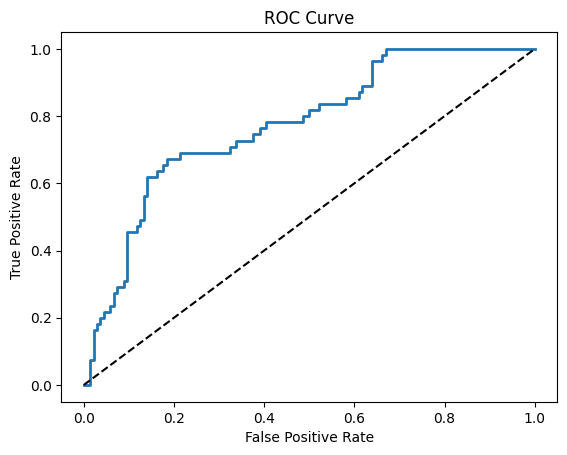

In [62]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier로 앙상블
ensemble = VotingClassifier(estimators=[
    ('rfc', gs_rfc_best),
    ('lgbm', gs_lgbm_best),
    ('xgb', gs_xgb_best)
], voting='soft')

ensemble.fit(train_x, train_y)

# 예측
pred_y = ensemble.predict(test_x)
prob_y = ensemble.predict_proba(test_x)

# 성능 평가
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# Confusion Matrix 출력
confusion = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, AUC: {auc:.3f}")

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### VotingClassifier로 앙상블 - 성능낮은 xgboost 제외

Confusion Matrix:
 [[84 52]
 [15 40]]
Accuracy: 0.649, Precision: 0.435, Recall: 0.727, AUC: 0.788


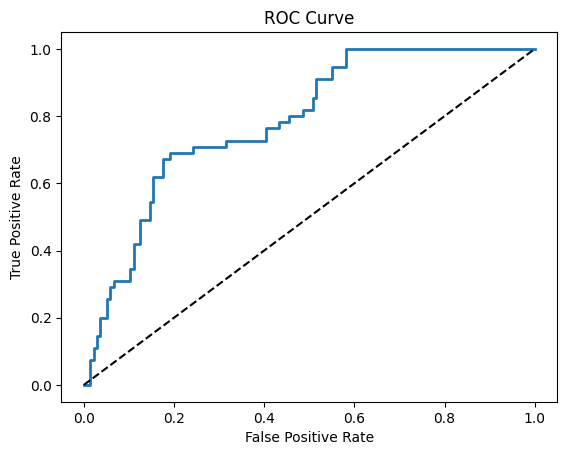

In [63]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier로 앙상블
ensemble = VotingClassifier(estimators=[
    ('rfc', gs_rfc_best),
    ('lgbm', gs_lgbm_best),
], voting='soft')

ensemble.fit(train_x, train_y)

# 예측
pred_y = ensemble.predict(test_x)
prob_y = ensemble.predict_proba(test_x)

# 성능 평가
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# Confusion Matrix 출력
confusion = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, AUC: {auc:.3f}")

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### VotingClassifier로 앙상블 - feature imporatance 기반 특성 선정해서 진행

Confusion Matrix:
 [[79 57]
 [12 43]]
Accuracy: 0.639, Precision: 0.430, Recall: 0.782, AUC: 0.774


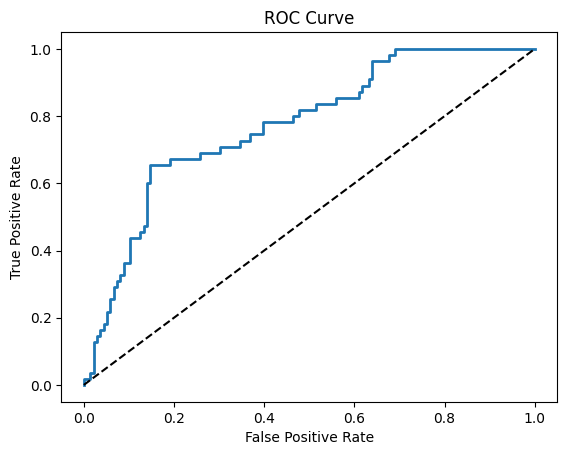

In [64]:
# Feature Importance 기반 중요 특성 선택
# feat_imp는 이미 계산된 데이터로 가정
def get_important_features(feat_imp, threshold=0.01):
    return feat_imp[feat_imp['mean'] > threshold].index

# 가정: feat_imp 데이터프레임이 이미 존재한다고 가정
important_features = get_important_features(feat_imp)
train_x_selected = train_x[important_features]
test_x_selected = test_x[important_features]

# RandomForest 재학습
gs_rfc_best.fit(train_x_selected, train_y)

# LightGBM 재학습
gs_lgbm_best.fit(train_x_selected, train_y)

# XGBoost 재학습
gs_xgb_best.fit(train_x_selected, train_y)

# VotingClassifier로 앙상블
ensemble = VotingClassifier(estimators=[
    ('rfc', gs_rfc_best),
    ('lgbm', gs_lgbm_best),
    ('xgb', gs_xgb_best)
], voting='soft')

ensemble.fit(train_x_selected, train_y)

# 예측
pred_y = ensemble.predict(test_x_selected)
prob_y = ensemble.predict_proba(test_x_selected)

# 성능 평가
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# Confusion Matrix 출력
confusion = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, AUC: {auc:.3f}")

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Confusion Matrix:
 [[77 59]
 [13 42]]
Accuracy: 0.623, Precision: 0.416, Recall: 0.764, AUC: 0.796


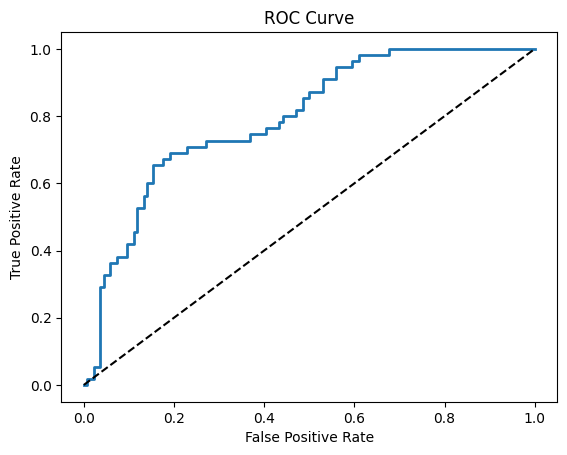

In [96]:
# Feature Importance 기반 중요 특성 선택
# feat_imp는 이미 계산된 데이터로 가정
def get_important_features(feat_imp, threshold=0.01):
    return feat_imp[feat_imp['mean'] > threshold].index

# 가정: feat_imp 데이터프레임이 이미 존재한다고 가정
important_features = get_important_features(feat_imp)
train_x_selected = train_x[important_features]
test_x_selected = test_x[important_features]

# RandomForest 재학습
gs_rfc_best.fit(train_x_selected, train_y)

# LightGBM 재학습
gs_lgbm_best.fit(train_x_selected, train_y)

# XGBoost 재학습
gs_xgb_best.fit(train_x_selected, train_y)

# VotingClassifier로 앙상블
ensemble = VotingClassifier(estimators=[
    ('rfc', gs_rfc_best),
    ('lgbm', gs_lgbm_best),
    ('xgb', gs_xgb_best)
], voting='soft')

ensemble.fit(train_x_selected, train_y)

# 예측
pred_y = ensemble.predict(test_x_selected)
prob_y = ensemble.predict_proba(test_x_selected)

# 성능 평가
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# Confusion Matrix 출력
confusion = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, AUC: {auc:.3f}")

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Confusion Matrix:
 [[81 55]
 [14 41]]
Accuracy: 0.639, Precision: 0.427, Recall: 0.745, AUC: 0.786


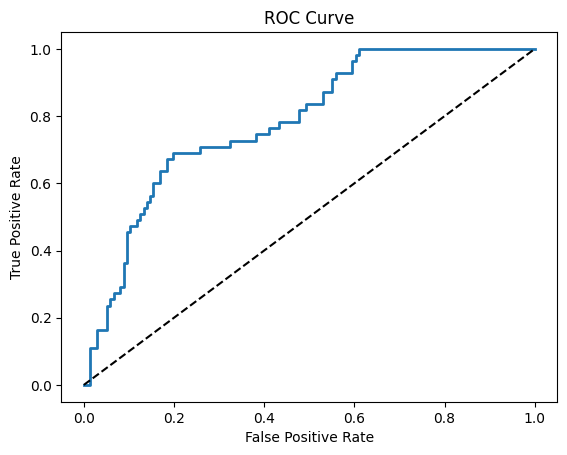

In [65]:
# VotingClassifier로 앙상블
ensemble = VotingClassifier(estimators=[
    ('rfc', gs_rfc_best),
    ('lgbm', gs_lgbm_best)
], voting='soft')

ensemble.fit(train_x_selected, train_y)

# 예측
pred_y = ensemble.predict(test_x_selected)
prob_y = ensemble.predict_proba(test_x_selected)

# 성능 평가
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# Confusion Matrix 출력
confusion = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, AUC: {auc:.3f}")

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 데이터 샘플 크기 증가 및 하이퍼파라미터 한 번 더 조정

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
================= confusion matrix ====================
[[89 47]
 [14 41]]
정확도:0.680628272251309, 정밀도:0.4659090909090909, 재현율:0.7454545454545455
auc:0.6999331550802139


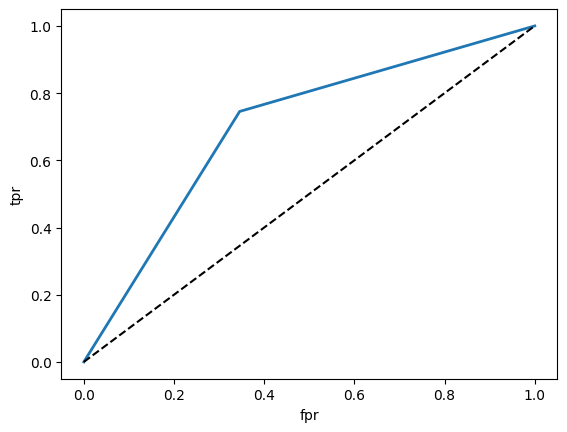

In [68]:
# 데이터 경로 설정 및 pickle 파일 불러오기
DATA_PATH = '/home/estherj/aiffel/7. 시계열/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:2000] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:2000]

# 4가 더 좋았으므로 이걸로 일단 재진행
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0)

# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [10, 50, 100, 200],
             'max_features': [0.5, 0.7, 1.0],
             'estimator__max_depth': [5, 10, 20, 30, 50],
             'estimator__max_features': [None, 'auto', 'sqrt'],
             'estimator__min_samples_leaf': [5, 10, 20],
             'bootstrap_features': [False, True]
            }

# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

# Bagging 적용
bag_rfc = BaggingClassifier(rfc)

# GridSearchCV 적용
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

# test_y, pred_y를 활용한 지표 적용
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

# ROC curve 만들기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve 시각화
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')


- cv = 4 , 데이터샘플 1000개 일때 randomforest 결과가 이제까지 가장 좋았는데,
- 샘플 수를 늘리고 앙상블로 하이퍼파라미터를 조정하였을때 전반적으로 소폭 성능이 향상되었다

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
================= confusion matrix ====================
[[90 46]
 [15 40]]
=======================================================
정확도:0.680628272251309, 정밀도:0.46511627906976744, 재현율:0.7272727272727273
auc:0.6945187165775402

---->

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
================= confusion matrix ====================
[[89 47]
 [14 41]]
=======================================================
정확도:0.680628272251309, 정밀도:0.4659090909090909, 재현율:0.7454545454545455
auc:0.6999331550802139

[회고]

데이터에(도메인) 대한 이해가 떨어지다 보니 문제점을 파악하고 적합한 모델링을 찾는데 어려움이 있었습니다.
추후 도메인에 대한 이해도가 높아져 조금 더 데이터를 살펴볼 수 있는 능력이 향상된다면
더 좋은 모델링을 할 수 있지 않을까 기대합니다.